# 1. Classification

* **Binary classification:** only two classes;
* **Multiclass classification:** more then one classes, but finite number.

Flower classification

*Iris Setosa* and *Iris Versicolor*

In [130]:
%matplotlib inline
import numpy as np
import pandas as pd

import tensorflow as tf
from machine_learning.util.tf_utils import *

## 1.1 Prepare dataset

In [32]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [86]:
X = data[data['species']!=0][['sepal_width', 'petal_length']]
X['bias'] = 1
X = X[['bias', 'sepal_width', 'petal_length']]

X.head()

,bias,sepal_width,petal_length
0,1,2.8,5.6
1,1,2.3,3.3
2,1,2.5,4.5
7,1,3.1,5.1
8,1,3.1,4.4


In [289]:
y = data[data['species']!=0]['species']
y = y * 1.
y -= 1

y.head()

0    1.0
1    0.0
2    1.0
7    1.0
8    0.0
Name: species, dtype: float64

In [290]:
dataset = tf.data.Dataset\
    .from_tensor_slices(
        (X.values, y.values.reshape((y.shape[0], 1)))
    ) \
    .repeat(100)\
    .shuffle(1000) \
    .batch(y.shape[0])
#.batch(1)

## 1.2 Problem

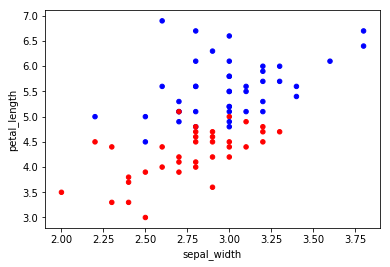

In [38]:
colors = y.replace(1, 'red').replace(2, 'blue')
X.plot.scatter(x='sepal_width', y='petal_length', c=colors)

In [3]:
classification with sign(w.T @ x_i)

SyntaxError: invalid syntax (<ipython-input-3-34b5d982f9f3>, line 1)

### Logistic regression

classification with $\sigma(\cdot)$

Bernoulli Distribution

log-likelihood of the condititional

Cross entropy loss

## Training

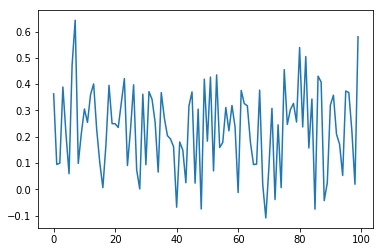

In [292]:
w = np.zeros(shape=[X.shape[1], 1], dtype=np.float32)
α = 0.0001

mean = tf.reduce_mean
σ = tf.sigmoid

cross_entropy_loss = []
errors = []

for i, (X_, y_) in enumerate(dataset):
    #cross_entropy_loss.append(y_ * log(σ(X_ @ w)) + (1-y_)*log(σ(X_ @ w)))
    errors.append(mean((y_ - σ(X_ @ w)) * X_).numpy())
    
    w = w + α * mean((y_ - σ(X_ @ w)) * X_, axis=0).to_vector()

plt.plot(errors)

array([0.50817297, 0.50510958, 0.50668383, 0.50766888, 0.50679683,
       0.50601552, 0.50741973, 0.50993908, 0.50724977, 0.50870505,
       0.50949781, 0.50795763, 0.5084955 , 0.50817297, 0.50809378,
       0.5085013 , 0.50610051, 0.50762929, 0.50688182, 0.50750471,
       0.50648005, 0.50481501, 0.50696101, 0.50812758, 0.50717636,
       0.50845591, 0.50770848, 0.5075501 , 0.50956541, 0.5075105 ,
       0.50775386, 0.50718794, 0.50971313, 0.50882962, 0.50675723,
       0.5061797 , 0.50721017, 0.50725556, 0.50879581, 0.5075105 ,
       0.50816139, 0.50523997, 0.50593632, 0.50829175, 0.50730673,
       0.50816718, 0.50656504, 0.50908453, 0.50911255, 0.50812758,
       0.5069668 , 0.508875  , 0.50738013, 0.50577213, 0.50646847,
       0.50684222, 0.50775965, 0.50709138, 0.5069272 , 0.50638927,
       0.50841053, 0.50717636, 0.50680262, 0.5075105 , 0.50775386,
       0.50705178, 0.5085013 , 0.50954319, 0.50733475, 0.50514918,
       0.50626469, 0.50572095, 0.50726135, 0.50630429, 0.50886

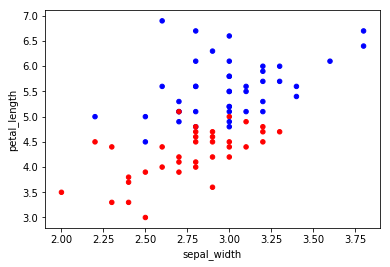

In [296]:
import matplotlib.pyplot as plt
X.plot.scatter(x='sepal_width', y='petal_length', c=colors)

plt.plot(x=X['sepal_width'].values.reshape(-1), y=σ(X.values @ w).numpy().reshape(-1))

σ(X.values @ w).numpy().reshape(-1)